In [1]:
import re
import nltk
import pandas as pd
import wrangle
import unicodedata
from wrangle import wrangle_articles
import env
import utilities

In [2]:
# utilities.nan_null_empty_check(df)

In [3]:
articles = pd.read_csv("art.csv", dtype={'clean_text': 'str'}, index_col = 0)

In [4]:
df = articles

In [5]:
df.head()

,date,subject,title,text,clean_title,clean_text,is_fake,title_polarity,title_subjectivity,text_polarity,text_subjectivity
0,2015-03-31,politics,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,flashback king obama commute sentence 22 drug ...,making room hillary president obama today anno...,True,0.000000,0.000000,-0.201587,0.493452
1,2015-03-31,politics,APPLE’S CEO SAYS RELIGIOUS FREEDOM LAWS ARE ‘D...,The gay mafia has a new corporate Don. This i...,apple ceo say religious freedom law dangerous ...,gay mafia new corporate article need read shee...,True,0.058333,0.579167,-0.040032,0.582057
2,2015-03-31,politics,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",watch dirty harry reid lie romneys tax didnt win,case missed sen harry reid rnv announced last ...,True,0.100000,0.600000,0.150000,0.511111
3,2015-03-31,politics,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,oh guess funded shrine ted kennedy,nothing like political cronyism make stomach c...,True,0.000000,0.000000,0.122865,0.441116
4,2015-03-31,politics,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,benghazi panel call hillary testify oath white...,anyone really think hillary clinton come clean...,True,0.000000,0.000000,0.110586,0.433784


In [6]:
df.clean_text.dtype

dtype('O')

In [7]:
df = df.dropna()

In [8]:
df.isnull().count()

date                  38022
subject               38022
title                 38022
text                  38022
clean_title           38022
clean_text            38022
is_fake               38022
title_polarity        38022
title_subjectivity    38022
text_polarity         38022
text_subjectivity     38022
dtype: int64

In [9]:
df.isna().count()

date                  38022
subject               38022
title                 38022
text                  38022
clean_title           38022
clean_text            38022
is_fake               38022
title_polarity        38022
title_subjectivity    38022
text_polarity         38022
text_subjectivity     38022
dtype: int64

In [10]:
df.shape

(38022, 11)

In [11]:
def show_counts_and_ratios(df, column):
    """
    This fucntion takes in a df and column name.
    Will produce a valuecounts for each label and the percetage of the data it represents
    """
    fof = pd.concat([df.is_fake.value_counts(),
                        df.is_fake.value_counts(normalize=True)], axis=1)
    fof.columns = ['n', 'percent']
    
    return fof

show_counts_and_ratios(df, 'is_fake')

,n,percent
False,20733,0.54529
True,17289,0.45471


In [12]:
def _generate_list_for_clean_text(df):

    all_clean_text = " ".join(df.clean_text)
        
    return re.sub(r"[^\w\s]", "", all_clean_text).split()
        

In [13]:
all_articles = _generate_list_for_clean_text(df)[0:10]

In [14]:
all_articles

['making',
 'room',
 'hillary',
 'president',
 'obama',
 'today',
 'announced',
 'decision',
 'commute',
 'sentence']

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38022 entries, 0 to 38469
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                38022 non-null  object 
 1   subject             38022 non-null  object 
 2   title               38022 non-null  object 
 3   text                38022 non-null  object 
 4   clean_title         38022 non-null  object 
 5   clean_text          38022 non-null  object 
 6   is_fake             38022 non-null  bool   
 7   title_polarity      38022 non-null  float64
 8   title_subjectivity  38022 non-null  float64
 9   text_polarity       38022 non-null  float64
 10  text_subjectivity   38022 non-null  float64
dtypes: bool(1), float64(4), object(6)
memory usage: 3.2+ MB


In [16]:
fake_words = (' '.join(df[df.is_fake == True].clean_text))
real_words = (' '.join(df[df.is_fake == False].clean_text))
all_words = (' '.join(df.clean_text))

In [17]:
fake_words = re.sub(r"[^\w\s]", "", fake_words).split()

In [18]:
real_words = re.sub(r"[^\w\s]", "", real_words).split()

In [19]:
all_words = re.sub(r"[^\w\s]", "", all_words).split()

# Top Ten Words for fake-real-all

In [20]:
fake_freq = pd.Series(fake_words).value_counts()

fake_freq.head(10)

trump        62524
said         22715
people       20510
president    19329
one          18031
would        17970
state        15789
u            14711
donald       14561
like         14289
dtype: int64

In [21]:
real_freq = pd.Series(real_words).value_counts()

real_freq.head(10)

said          95644
trump         53273
u             40108
state         35237
would         30619
president     26174
republican    21813
government    18565
year          18125
house         16563
dtype: int64

In [22]:
all_freq = pd.Series(all_words).value_counts()

all_freq.head(10)

said          118359
trump         115797
u              54819
state          51026
would          48589
president      45503
republican     35716
people         35279
one            30608
year           28859
dtype: int64

# Takeaways

    - The top words for fake news articles are: trump, said, people, president, one.
    - The top words for real news articles are: said, trump, u, state, would. 
    - The tope words for all news articles are: said, trump, u, state, would

In [23]:
word_counts = (pd.concat([all_freq, fake_freq, real_freq], axis=1, sort=True)
                .set_axis(['all', 'fake', 'real'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.tail(10)

,all,fake,real
zynga,4,1,3
zypries,5,0,5
zyries,1,0,1
zyuganov,7,0,7
zyuseragentifzxzbreak,1,1,0
zz,1,1,0
zztaine,1,1,0
zzzzaaaacccchhh,3,3,0
zzzzzzzz,1,1,0
zzzzzzzzzzzzz,1,1,0


In [24]:
word_counts.sort_values(by='all', ascending=False).head(50)

,all,fake,real
said,118359,22715,95644
trump,115797,62524,53273
u,54819,14711,40108
state,51026,15789,35237
would,48589,17970,30619
president,45503,19329,26174
republican,35716,13903,21813
people,35279,20510,14769
one,30608,18031,12577
year,28859,10734,18125


# Visualizations

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Proportion of Fake vs Real news for the 20 most common words')

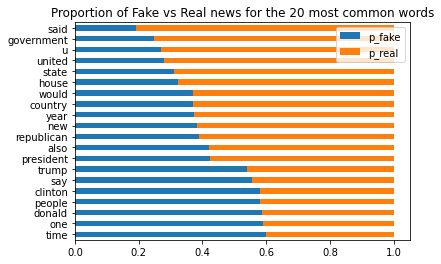

In [26]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_fake=word_counts.fake / word_counts['all'],
         p_real=word_counts.real / word_counts['all'])
 .sort_values(by='all')
 [['p_fake', 'p_real']]
 .tail(20)
 .sort_values('p_real')
 .plot.barh(stacked=True))

plt.title('Proportion of Fake vs Real news for the 20 most common words')

# Takeaways

    - We found that the the most common fake news words were time, one, donald, people, clinton

In [64]:
word_counts_all = (word_counts
 [(word_counts.fake > 10) & (word_counts['all'] > 10)]
 .assign(ratio=lambda df: df.fake / (df['all'] + .01))
 .sort_values(by='all', ascending = False)
 .pipe(lambda df: pd.concat([df.head(), df.head(20)])))

In [65]:
word_counts_all

,all,fake,real,ratio
said,118359,22715,95644,0.191916
trump,115797,62524,53273,0.539945
u,54819,14711,40108,0.268356
state,51026,15789,35237,0.309430
would,48589,17970,30619,0.369837
said,118359,22715,95644,0.191916
trump,115797,62524,53273,0.539945
u,54819,14711,40108,0.268356
state,51026,15789,35237,0.309430
would,48589,17970,30619,0.369837


    - 50 percent of all had trump as a keyword, 54 percent of these instances are fake.
    - The higest amkount of instances is associated with the word said at 118359 instances.
    - The word said only occured in 19% of fake articles, while 81% where associated with real news articles.
    - The second highest ammount of intances is associated with the word/name trump at 115797 intances and making up over 53% being in fake news realted articles. 

In [55]:
word_counts_fake = (word_counts
 [(word_counts.fake > 10) & (word_counts.real > 10)]
 .assign(ratio=lambda df: df.fake / (df.real + .01))
 .sort_values(by='ratio', ascending = False)
 .pipe(lambda df: pd.concat([df.head(), df.head(20)])))

In [56]:
word_counts_fake

,all,fake,real,ratio
cop,955,939,16,58.650843
hannity,934,918,16,57.339163
gop,3738,3649,89,40.995394
damn,433,422,11,38.328792
rant,464,451,13,34.665642
cop,955,939,16,58.650843
hannity,934,918,16,57.339163
gop,3738,3649,89,40.995394
damn,433,422,11,38.328792
rant,464,451,13,34.665642


     - Fake news articles tend to have words with negative connotations such as bigoted, disgusting, pathetic, insane, and idiot. 
     - 

In [50]:
word_counts_real = (word_counts
 [(word_counts.fake > 10) & (word_counts.real > 10)]
 .assign(ratio=lambda df: df.real / (df.fake + .01))
 .sort_values(by='ratio', ascending = False)
 .pipe(lambda df: df.head(20)))

In [51]:
word_counts_real

,all,fake,real,ratio
thats,1161,17,1144,67.254556
im,1223,18,1205,66.907274
lebanese,645,11,634,57.584015
dont,2038,38,2000,52.617732
parliamentary,776,15,761,50.699534
km,674,14,660,47.109208
ankara,853,18,835,46.363132
cant,561,12,549,45.711907
beijing,2047,44,2003,45.512384
beirut,510,11,499,45.322434


    - Real news articles use words that are more centered around world events and places.
    - Ankara is the captiol of turkey
    - sdf may be syarian democratic forces or a type of geospacial file type.

# Wordclouds for Real-Fake-Combined

In [31]:
from wordcloud import WordCloud

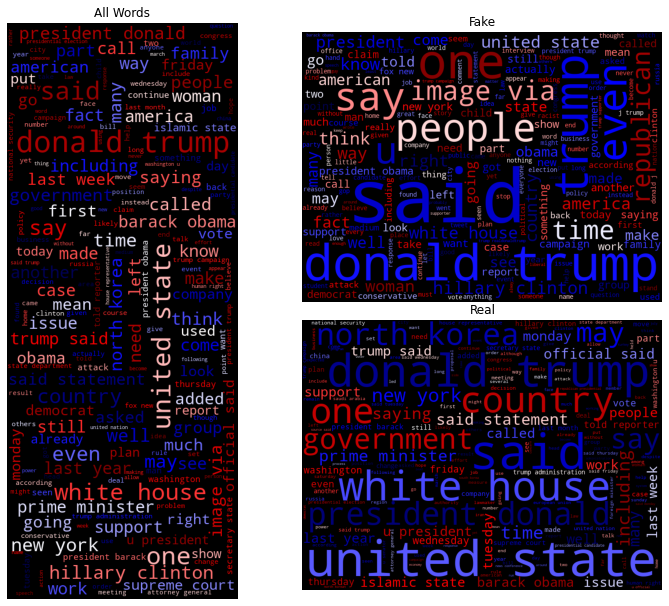

In [32]:
all_cloud = WordCloud(background_color='black', height=1000, width=400, colormap="seismic_r").generate(' '.join(all_words))
fake_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(fake_words))
real_cloud = WordCloud(background_color='black', height=600, width=800, colormap="seismic_r").generate(' '.join(real_words))

plt.figure(figsize=(10, 8))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(fake_cloud)
axs[2].imshow(real_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Fake')
axs[2].set_title('Real')

for ax in axs: ax.axis('off')

# Takeaways

    - Said and donald trump are the tope two words in the fake news related articles. 
    - This could be related to some quates that were infered by the press or missleading. (id like to look into this deeper and actualy compare if these statments match what trump acutaly said)
    - 

In [33]:
import numpy as np
from PIL import Image

# Bigrams (Fake - Real)

In [34]:
top_20_fake_bigrams = (pd.Series(nltk.ngrams(fake_words, 2))
                      .value_counts()
                      .head(20))

top_20_fake_bigrams.head()

(donald, trump)       11132
(image, via)           6081
(hillary, clinton)     4982
(white, house)         4700
(united, state)        4563
dtype: int64

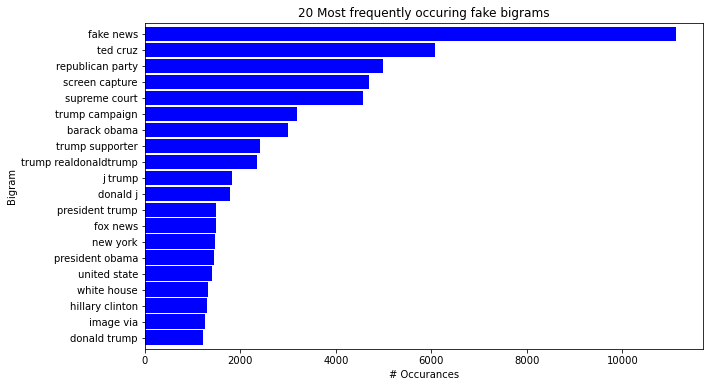

In [35]:
top_20_fake_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring fake bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_fake_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# Takeaways 

    - The bigrams for fake news articles are filled with "in house" events and places such as supreme count, republican part, and trumps twitter tag. 

In [36]:
top_20_real_bigrams = (pd.Series(nltk.ngrams(real_words, 2))
                      .value_counts()
                      .head(20))

top_20_real_bigrams.head()

(united, state)        11823
(donald, trump)         9941
(white, house)          8221
(president, donald)     5765
(north, korea)          5354
dtype: int64

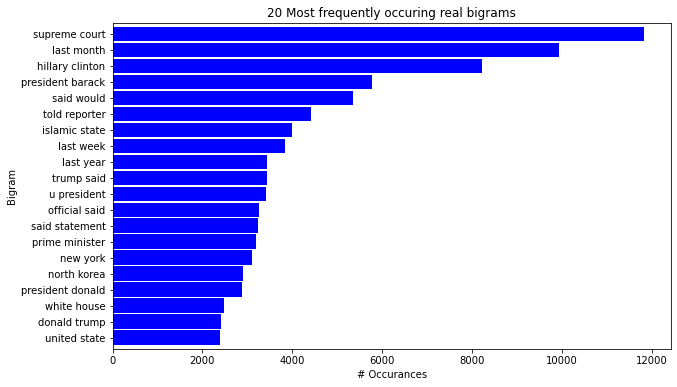

In [37]:
top_20_real_bigrams.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring real bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_real_bigrams.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1])
_ = plt.yticks(ticks, labels)

# Takeaways 

    - The bigrams for real news are filled with phrases that repesernt world events and significant moments in time. 

In [38]:
top_20_real_trigrams2 = (pd.Series(nltk.ngrams(real_words, 3))
                      .value_counts()
                      .head(20))

top_20_real_trigrams2.head()

(president, donald, trump)     5696
(u, president, donald)         2439
(president, barack, obama)     1979
(white, house, said)            946
(president, barack, obamas)     895
dtype: int64

# Trigrams (Real - Fake)

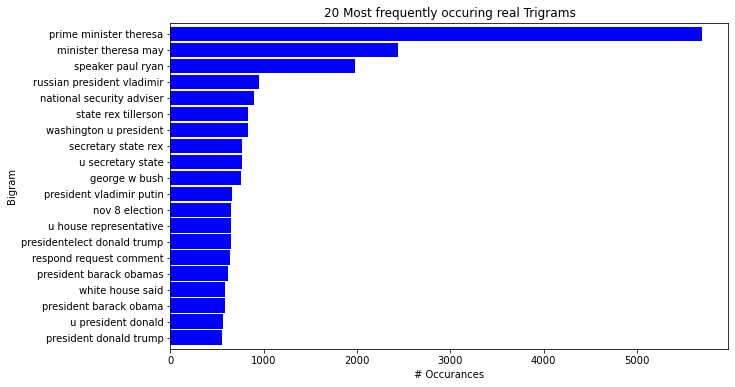

In [39]:
top_20_real_trigrams2.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring real Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_real_trigrams2.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

# Takeaways

    - 

In [40]:
top_20_fake_trigrams2 = (pd.Series(nltk.ngrams(fake_words, 3))
                      .value_counts()
                      .head(20))

top_20_fake_trigrams2.head()

(donald, j, trump)             1782
(j, trump, realdonaldtrump)    1490
(new, york, time)              1057
(21st, century, wire)           954
(black, life, matter)           784
dtype: int64

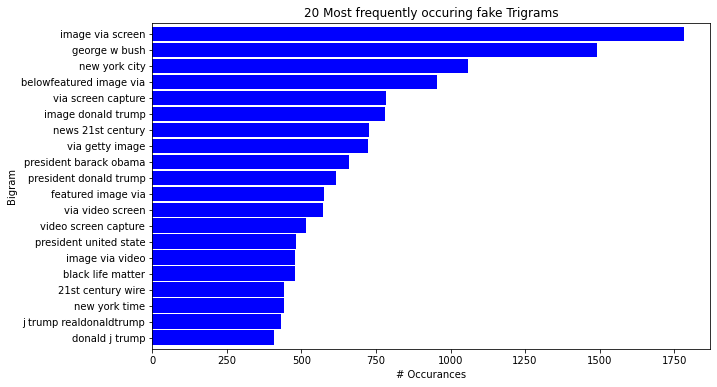

In [41]:
top_20_fake_trigrams2.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring fake Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_fake_trigrams2.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2])
_ = plt.yticks(ticks, labels)

In [70]:
top_20_fake_trigrams2 = (pd.Series(nltk.ngrams(fake_words, 4))
                      .value_counts()
                      .head(20))

top_20_fake_trigrams2.head()

(donald, j, trump, realdonaldtrump)    1490
(image, via, video, screen)             655
(via, video, screen, capture)           624
(news, 21st, century, wire)             479
(image, via, screen, capture)           402
dtype: int64

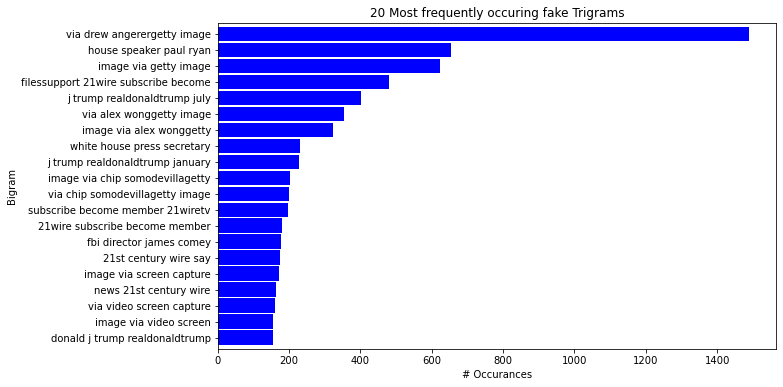

In [72]:
top_20_fake_trigrams2.sort_values().plot.barh(color='blue', width=.9, figsize=(10, 6))

plt.title('20 Most frequently occuring fake Trigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurances')

# make the labels pretty
ticks, _ = plt.yticks()
labels = top_20_fake_trigrams2.reset_index()['index'].apply(lambda t: t[0] + ' ' + t[1] + ' ' + t[2] + ' ' + t[3])
_ = plt.yticks(ticks, labels)

# Takeaways

     - 

# Wordclouds for Single-Bigram-Trigram